# Regula de învăţare a perceptronului

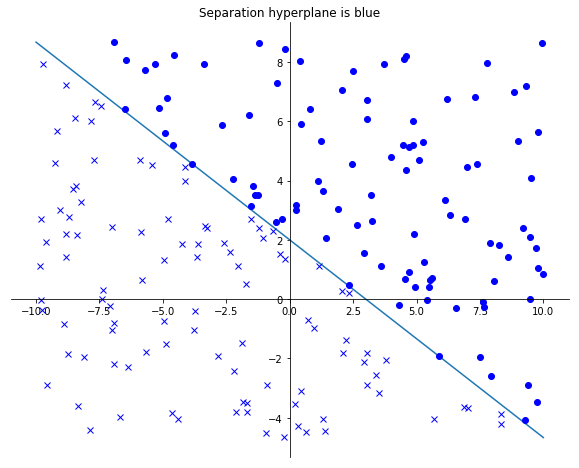

In [164]:
import numpy as np
import matplotlib.pyplot as plt

# pentru reprezentarea am considerat forma ecuatiei ax + by + 1 = 0
# deci y = (-1 - ax) / b
# dar voi puteti folosi orice forma, inclusiv ax + by + c = 0

# alegem un exemplu de hiperplan 2D (dreaptă)
a, b = (-1.0 / 3), (-1.0 / 2)

# porţiunea de plan pe care o reprezentăm este de x aparţine lui [-lim, lim]
lim = 10

# numărul de puncte de fiecare fel
n = 100

...

In [169]:
# coeficienţii hiperplanului căutat sunt iniţializaţi aleator
w = np.random.rand(3)

# păstrăm o copie ca să reprezentăm dreapta iniţială
w_init = w.copy()

...

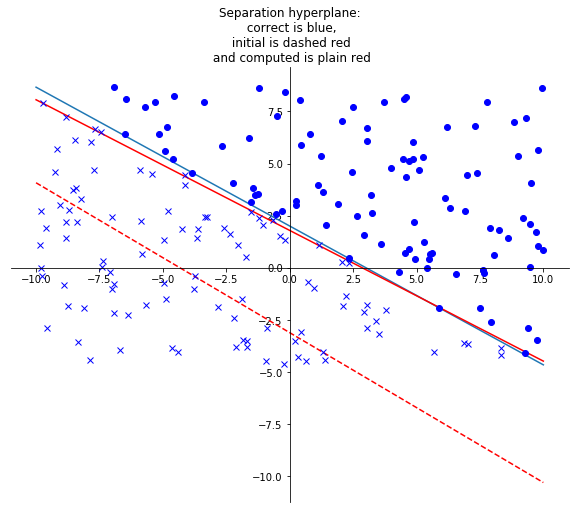

In [173]:
...

# dreapta de separaţie este foarte aproape (uneori coincide) cu cea teoretică

# Perceptron pentru caracterele "0" şi "1" reprezentate ca rastru de pixeli

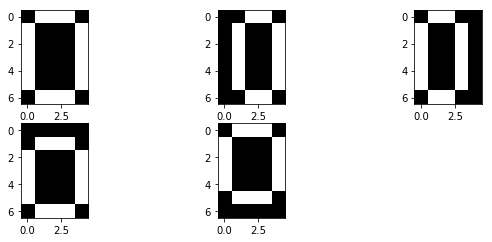

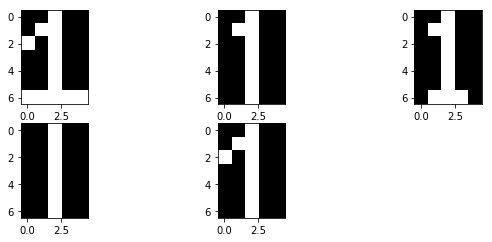

In [41]:
# pentru că mi-a fost lene, am luat dimensiunea rastrului de 7 x 5 şi nu 8 x 8
# de asemenea am doar 5 caractere de train din fiecare clasă,
# respectiv 3 caractere de test din fiecare fel
# voi faceti cum se cere!

import numpy as np
import matplotlib.pyplot as plt

train_set_x = np.array([
    [0, 1, 1, 1, 0, 
     1, 0, 0, 0, 1,
     1, 0, 0, 0, 1,
     1, 0, 0, 0, 1,
     1, 0, 0, 0, 1,
     1, 0, 0, 0, 1,
     0, 1, 1, 1, 0],
    [0, 0, 1, 1, 0,
     0, 1, 0, 0, 1,
     0, 1, 0, 0, 1,
     0, 1, 0, 0, 1,
     0, 1, 0, 0, 1,
     0, 1, 0, 0, 1,
     0, 0, 1, 1, 0],
    [0, 1, 1, 0, 0,
     1, 0, 0, 1, 0,
     1, 0, 0, 1, 0,
     1, 0, 0, 1, 0,
     1, 0, 0, 1, 0,
     1, 0, 0, 1, 0,
     0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0,
     0, 1, 1, 1, 0,
     1, 0, 0, 0, 1,
     1, 0, 0, 0, 1,
     1, 0, 0, 0, 1,
     1, 0, 0, 0, 1,
     0, 1, 1, 1, 0],
    [0, 1, 1, 1, 0,
     1, 0, 0, 0, 1,
     1, 0, 0, 0, 1,
     1, 0, 0, 0, 1,
     1, 0, 0, 0, 1,
     0, 1, 1, 1, 0,
     0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0,
     0, 1, 1, 0, 0,
     1, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     1, 1, 1, 1, 1],
    [0, 0, 1, 0, 0,
     0, 1, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0,
     0, 1, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 1, 1, 1, 0],
    [0, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0,
     0, 1, 1, 0, 0,
     1, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0]
])
train_set_y = [-1, -1, -1, -1, -1, 1, 1, 1, 1, 1]

fig = plt.figure(num=1, figsize=(10, 8)) 
for i in range(0, 5):
    ax = fig.add_subplot(430 + i + 1)
    ax.imshow(255 * train_set_x[i].reshape(7, 5), cmap='gray')
    
fig = plt.figure(num=2, figsize=(10, 8)) 
for i in range(5, 10):
    ax = fig.add_subplot(430 + i - 4)
    ax.imshow(255 * train_set_x[i].reshape(7, 5), cmap='gray')

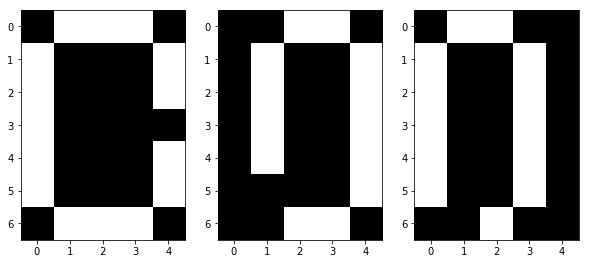

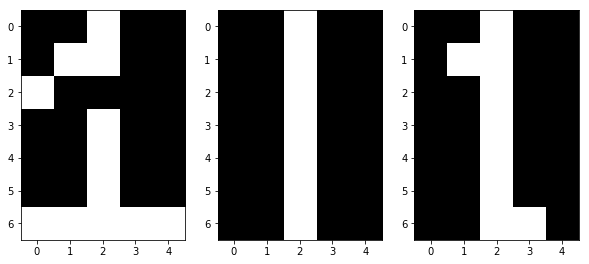

In [43]:
# setul de test are câte un pixel lipsă
test_set_x = np.array([
    [0, 1, 1, 1, 0, 
     1, 0, 0, 0, 1,
     1, 0, 0, 0, 1,
     1, 0, 0, 0, 0,
     1, 0, 0, 0, 1,
     1, 0, 0, 0, 1,
     0, 1, 1, 1, 0],
    [0, 0, 1, 1, 0,
     0, 1, 0, 0, 1,
     0, 1, 0, 0, 1,
     0, 1, 0, 0, 1,
     0, 1, 0, 0, 1,
     0, 0, 0, 0, 1,
     0, 0, 1, 1, 0],
    [0, 1, 1, 0, 0,
     1, 0, 0, 1, 0,
     1, 0, 0, 1, 0,
     1, 0, 0, 1, 0,
     1, 0, 0, 1, 0,
     1, 0, 0, 1, 0,
     0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0,
     0, 1, 1, 0, 0,
     1, 0, 0, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     1, 1, 1, 1, 1],
    [0, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0,
     0, 1, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 1, 0],
])
test_set_y = [-1, -1, -1, 1, 1, 1]

fig = plt.figure(num=3, figsize=(10, 8)) 
for i in range(0, 3):
    ax = fig.add_subplot(130 + i + 1)
    ax.imshow(255 * test_set_x[i].reshape(7, 5), cmap='gray')
    
fig = plt.figure(num=4, figsize=(10, 8)) 
for i in range(3, 6):
    ax = fig.add_subplot(130 + i - 2)
    ax.imshow(255 * test_set_x[i].reshape(7, 5), cmap='gray')

In [177]:
# funcţia de activare este o simplă treaptă [-1, 1] în jurul lui 0
h = np.vectorize(lambda net: 1 if net >= 0 else -1)

...

# tipărim numărul de clasificări greşite pentru setul de instruire
print("train: ", h(np.dot(x, w)), " vs. ", train_set_y, " diffs: ", sum(h(np.dot(x, w)) - train_set_y) / 2)

# tipărim numărul de clasificări greşite şi pentru setul de test
print("test: ", h(np.dot(x, w)), " vs. ", test_set_y, " diffs: ", sum(h(np.dot(x, w)) - test_set_y) / 2)

# foarte rar apare o diferenţă

train:  [-1 -1 -1 -1 -1  1  1  1  1  1]  vs.  [-1, -1, -1, -1, -1, 1, 1, 1, 1, 1]  diffs:  0.0
test:  [-1 -1 -1  1  1  1]  vs.  [-1, -1, -1, 1, 1, 1]  diffs:  0.0
